In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/src/ArtifactDetection/artifactdetection/')
%run analyse.py

os.chdir('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/')
%run constants.py

## All animals 

Separate data into clean and noisy epochs based on the spectral slope threshold, and append the analytics dataframe which counts the number of clean and noisy epochs for each animal to create an overall analytics dataframe.

In [3]:
directory_path = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/Power_test/'
save_clean_folder = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/clean_folder/'

In [ ]:
analytics_ls = []
analysis = Analysis(directory_path, analysis_ls)
for animal in analysis_ls:
    print(animal)
    clean_power, noise_power, analytics_df = analysis.process_animal(animal = animal, save = True, save_path = save_clean_folder)
    analytics_ls.append(analytics_df)

In [ ]:
analytics_summary = pd.concat(analytics_ls)

In [ ]:
analytics_summary

In [4]:
clean_ls = []
noisy_ls = []
for animal in analysis_ls:
    print(animal)
    clean_df = pd.read_csv(save_clean_folder + f'{animal}_clean_power.csv')
    noise_df = pd.read_csv(save_clean_folder + f'{animal}_noise_power.csv')
    clean_ls.append(clean_df)
    noisy_ls.append(noise_df)

S7088
S7092
S7086
S7063
S7064
S7069
S7070
S7072
S7086
S7091
S7101
S7094
S7096
S7098
S7068
S7074
S7075
S7071
S7076


In [5]:
clean_concat = pd.concat(clean_ls)
noise_concat = pd.concat(noisy_ls)

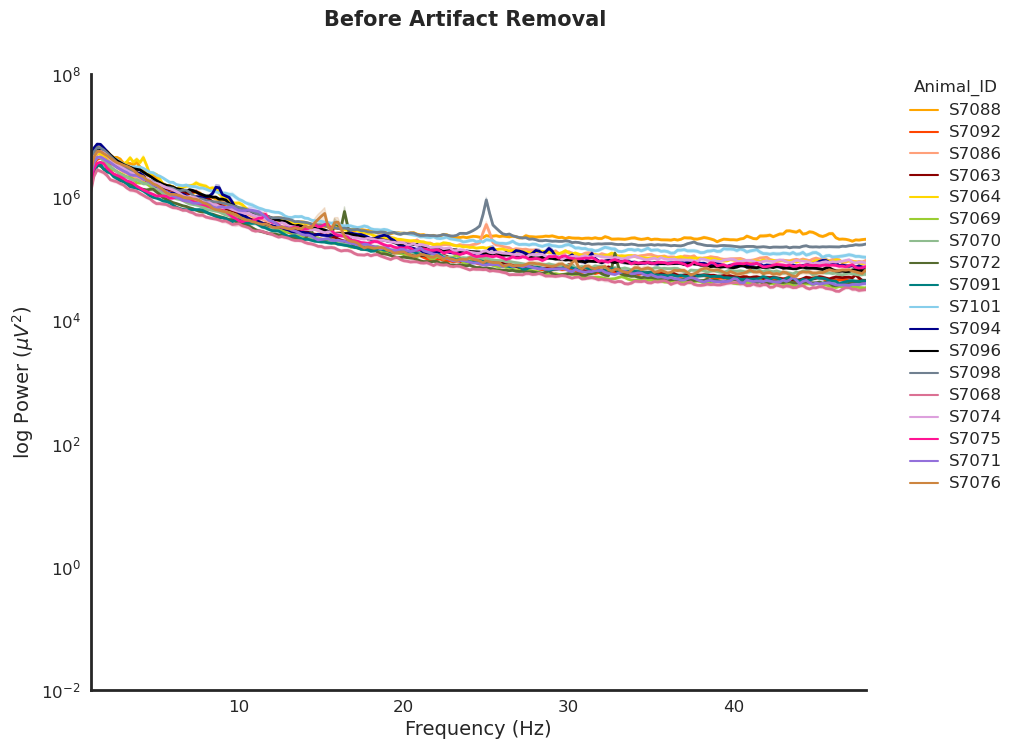

In [6]:
analysis = Analysis(directory_path, analysis_ls)
analysis.plot_results(noise_concat, palette=None, hue = 'Animal_ID', ylim = [10**-2, 10**8], title = 'Before Artifact Removal',
            save_folder = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/', save_as = 'before_artifact_removal')

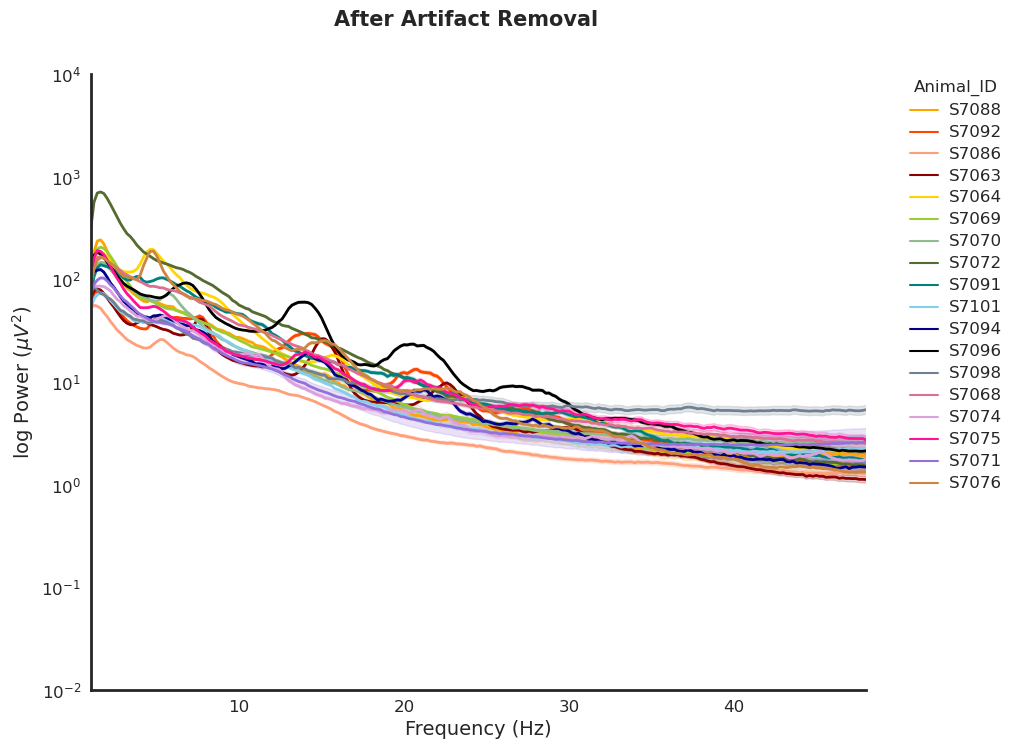

In [7]:
analysis.plot_results(clean_concat, palette=None, hue = 'Animal_ID', title = 'After Artifact Removal', 
                     save_folder = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/', save_as = 'after_artifact_removal')

In [8]:
WT_ls = ['S7068', 'S7070', 'S7071', 'S7074', 'S7086', 'S7091', 'S7098', 'S7101']
GAP_ls = ['S7063', 'S7064', 'S7069', 'S7072', 'S7075', 'S7076', 'S7088', 'S7092', 'S7094', 'S7096']
wt_blue_palette = ['#001f3f', '#003366', '#0052cc','#0074D9', '#0099ff','#33aaff','#7FDBFF','#39CCCC','#3D9970', 
                   '#2ECC40', '#01FF70', '#B2D8FF', '#6699cc']


gap_red_palette = ['#FF4136',  '#FF5733', '#FF6F61', '#FF851B', '#FF8C42','#FF9F80', '#FFDC00', '#85144b', '#B10DC9',
               '#F012BE', '#FF69B4', '#FFC0CB', '#FFB6C1']


In [10]:
wt_df = clean_concat.loc[clean_concat['Animal_ID'].isin(WT_ls)]
gap_df = clean_concat.loc[clean_concat['Animal_ID'].isin(GAP_ls)]

/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/src/ArtifactDetection/artifactdetection/analyse.py:97: UserWarning: The palette list has more values (13) than needed (8), which may not be intended.
  sns.lineplot(data=data_to_plot, x='Frequency', y='Power', hue= hue,


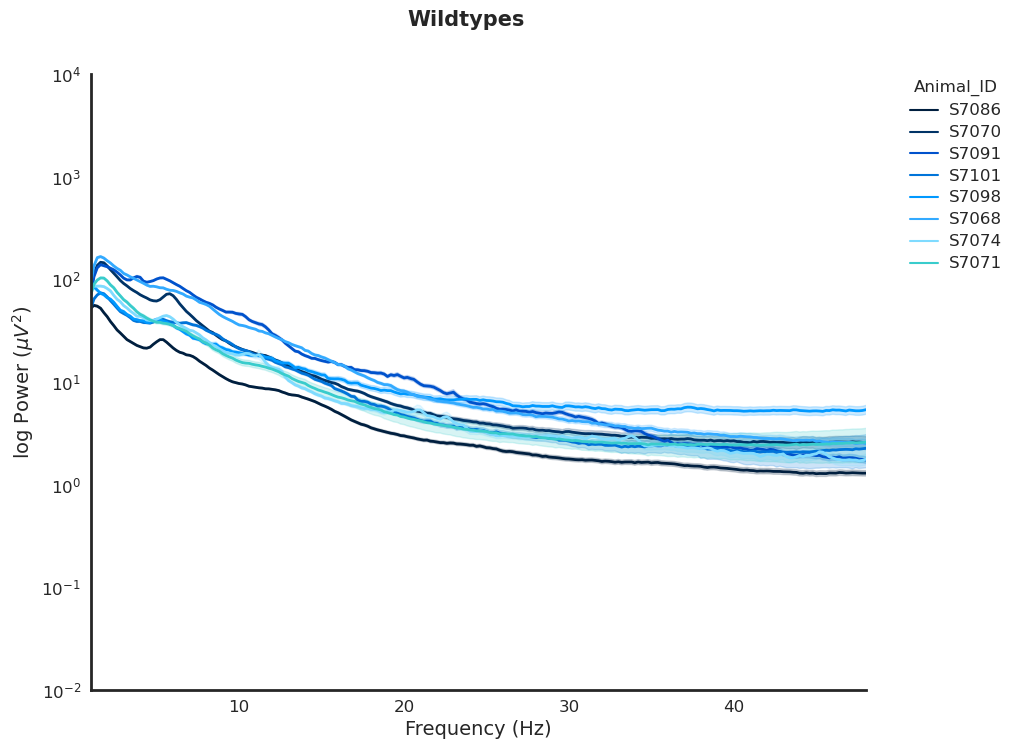

In [13]:
analysis.plot_results(wt_df, palette= wt_blue_palette, hue = 'Animal_ID', ylim = [10**-2, 10**4], title = 'Wildtypes',
            save_folder = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/', save_as = 'wildtypes')

In [ ]:
analysis.plot_results(gap_df, palette= gap_red_palette, hue = 'Animal_ID', ylim = [10**-2, 10**4], title = 'Mutants',
            save_folder = '/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/results/', save_as = 'mutants')

/home/melissa/PROJECT_DIRECTORIES/MLESP_EEG/src/ArtifactDetection/artifactdetection/analyse.py:97: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.lineplot(data=data_to_plot, x='Frequency', y='Power', hue= hue,
